## LAB 1 - PCA

In [13]:
import numpy as np
import pandas as pd

### Pandas Available Options
https://pandas.pydata.org/pandas-docs/stable/options.html

In [17]:
pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.4f}'.format) # get rid of scientific notation

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [69]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [133]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from scikitplot.decomposition import plot_pca_component_variance

from sklearn.pipeline import Pipeline

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
df = pd.read_csv('../../../data/islr-python/USArrests.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [10]:
df.sample(10)

,Murder,Assault,UrbanPop,Rape
Oregon,4.9,159,67,29.3
Iowa,2.2,56,57,11.3
Pennsylvania,6.3,106,72,14.9
Ohio,7.3,120,75,21.4
South Carolina,14.4,279,48,22.5
Florida,15.4,335,80,31.9
Massachusetts,4.4,149,85,16.3
New Mexico,11.4,285,70,32.1
Indiana,7.2,113,65,21.0
Alaska,10.0,263,48,44.5


In [18]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.0000,50.0000,50.0000,50.0000
mean,7.7880,170.7600,65.5400,21.2320
std,4.3555,83.3377,14.4748,9.3664
min,0.8000,45.0000,32.0000,7.3000
25%,4.0750,109.0000,54.5000,15.0750
50%,7.2500,159.0000,66.0000,20.1000
75%,11.2500,249.0000,77.7500,26.1750
max,17.4000,337.0000,91.0000,46.0000


In [19]:
df.var()

Murder                  18.9705
Assault              6,945.1657
UrbanPop               209.5188
Rape                    87.7292
dtype: float64

In [22]:
scale(df)[:10]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293]])

In [58]:
stnd_scalar = StandardScaler()
df_scaled = stnd_scalar.fit_transform(df)

In [59]:
print('mean: {},\nscale: {},\nvariance: {}'.format(df.mean(), df.std(), df.var()))

mean: Murder                   7.7880
Assault                170.7600
UrbanPop                65.5400
Rape                    21.2320
dtype: float64,
scale: Murder                   4.3555
Assault                 83.3377
UrbanPop                14.4748
Rape                     9.3664
dtype: float64,
variance: Murder                  18.9705
Assault              6,945.1657
UrbanPop               209.5188
Rape                    87.7292
dtype: float64


In [57]:
print('mean: {},\nscale: {},\nvariance: {}'.format(stnd_scalar.mean_, stnd_scalar.scale_, stnd_scalar.var_))

mean: [  7.788 170.76   65.54   21.232],
scale: [ 4.31173469 82.50007515 14.3292847   9.27224762],
variance: [  18.591056 6806.2624    205.3284     85.974576]


In [26]:
df_scaled[:10]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293]])

In [44]:
pca = PCA()
df_pca_fit = pca.fit(df_scaled)

In [35]:
steps = [('p_scalar', StandardScaler()),
        ('p_pca', PCA())]
pipeline = Pipeline(steps)

In [37]:
pipeline.fit_transform(df)[:10]

array([[ 9.85565885e-01,  1.13339238e+00, -4.44268788e-01,
         1.56267145e-01],
       [ 1.95013775e+00,  1.07321326e+00,  2.04000333e+00,
        -4.38583440e-01],
       [ 1.76316354e+00, -7.45956781e-01,  5.47808243e-02,
        -8.34652924e-01],
       [-1.41420290e-01,  1.11979678e+00,  1.14573692e-01,
        -1.82810896e-01],
       [ 2.52398013e+00, -1.54293399e+00,  5.98556799e-01,
        -3.41996478e-01],
       [ 1.51456286e+00, -9.87555085e-01,  1.09500699e+00,
         1.46488703e-03],
       [-1.35864746e+00, -1.08892789e+00, -6.43257569e-01,
        -1.18469414e-01],
       [ 4.77093091e-02, -3.25358925e-01, -7.18632942e-01,
        -8.81977637e-01],
       [ 3.01304227e+00,  3.92285133e-02, -5.76829492e-01,
        -9.62847520e-02],
       [ 1.63928304e+00,  1.27894240e+00, -3.42460080e-01,
         1.07679681e+00]])

In [46]:
df_pca_transform = pca.transform(df_scaled)
df_pca_transform[0:10]

array([[ 9.85565885e-01,  1.13339238e+00, -4.44268788e-01,
         1.56267145e-01],
       [ 1.95013775e+00,  1.07321326e+00,  2.04000333e+00,
        -4.38583440e-01],
       [ 1.76316354e+00, -7.45956781e-01,  5.47808243e-02,
        -8.34652924e-01],
       [-1.41420290e-01,  1.11979678e+00,  1.14573692e-01,
        -1.82810896e-01],
       [ 2.52398013e+00, -1.54293399e+00,  5.98556799e-01,
        -3.41996478e-01],
       [ 1.51456286e+00, -9.87555085e-01,  1.09500699e+00,
         1.46488703e-03],
       [-1.35864746e+00, -1.08892789e+00, -6.43257569e-01,
        -1.18469414e-01],
       [ 4.77093091e-02, -3.25358925e-01, -7.18632942e-01,
        -8.81977637e-01],
       [ 3.01304227e+00,  3.92285133e-02, -5.76829492e-01,
        -9.62847520e-02],
       [ 1.63928304e+00,  1.27894240e+00, -3.42460080e-01,
         1.07679681e+00]])

In [47]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [52]:
pca.n_components_

4

In [61]:
pd.DataFrame(pca.components_.T,
             index=df.columns,
             columns=['L' + str(i+1) for i in range(len(pca.components_))])


,L1,L2,L3,L4
Murder,0.5359,0.4182,-0.3412,0.6492
Assault,0.5832,0.1880,-0.2681,-0.7434
UrbanPop,0.2782,-0.8728,-0.3780,0.1339
Rape,0.5434,-0.1673,0.8178,0.0890


In [64]:
['L' + str(i+1) for i in range(len(pca.components_))]

['L1', 'L2', 'L3', 'L4']

In [84]:
LVectors = pd.DataFrame(pca.components_,
             columns=df.columns,
             index=['L' + str(i+1) for i in range(len(pca.components_))])
LVectors

,Murder,Assault,UrbanPop,Rape
L1,0.5359,0.5832,0.2782,0.5434
L2,0.4182,0.1880,-0.8728,-0.1673
L3,-0.3412,-0.2681,-0.3780,0.8178
L4,0.6492,-0.7434,0.1339,0.0890


In [88]:
print(df.shape, LVectors.shape)

(50, 4) (4, 4)


In [96]:
np.matmul(df_scaled, LVectors.T)[:2]

array([[ 0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333, -0.43858344]])

In [66]:
df_plot = pd.DataFrame(df_pca_transform, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.9856,1.1334,-0.4443,0.1563
Alaska,1.9501,1.0732,2.0400,-0.4386
Arizona,1.7632,-0.7460,0.0548,-0.8347
Arkansas,-0.1414,1.1198,0.1146,-0.1828
California,2.5240,-1.5429,0.5986,-0.3420
Colorado,1.5146,-0.9876,1.0950,0.0015
...,...,...,...,...
Vermont,-2.8014,1.4023,0.8413,-0.1449
Virginia,-0.0963,0.1997,0.0117,0.2114
Washington,-0.2169,-0.9701,0.6249,-0.2208


In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs

xvector = pca.components_[0]#L1 ---PC1
yvector = -pca.components_[1]#L2---PC2

xs = df_pca_transform[:,0] # PC1
ys = -df_pca_transform[:,1] #PC2

In [97]:
print(max(xs), min(xs), max(ys), min(ys))

3.013042270287223 -2.9922256150178645 1.5704600120431205 -2.3937959866443905


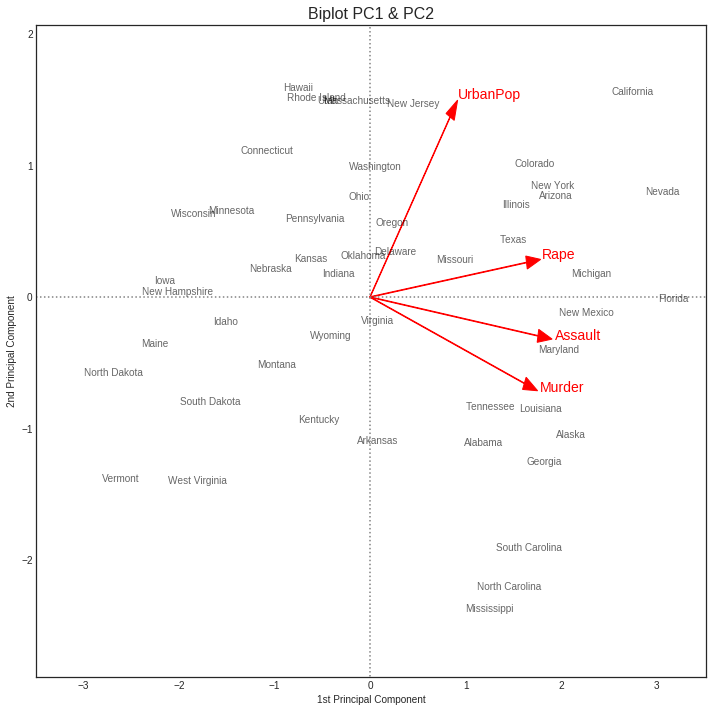

In [78]:
## visualize projections

plt.figure(figsize=(12, 12))

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.1)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             df.columns[i], color='r', size=14)

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    # plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i], ys[i], df.index[i], color='black', alpha=0.6)
    
plt.title('Biplot PC1 & PC2', size=16)    
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

m = 0.5
plt.xlim(min(xs) - m, max(xs) + m)
plt.ylim(min(ys) - m, max(ys) + m);

plt.hlines(0,min(xs) - m, max(xs) + m, linestyles='dotted', colors='grey')
plt.vlines(0,min(xs) - m, max(xs) + m, linestyles='dotted', colors='grey')

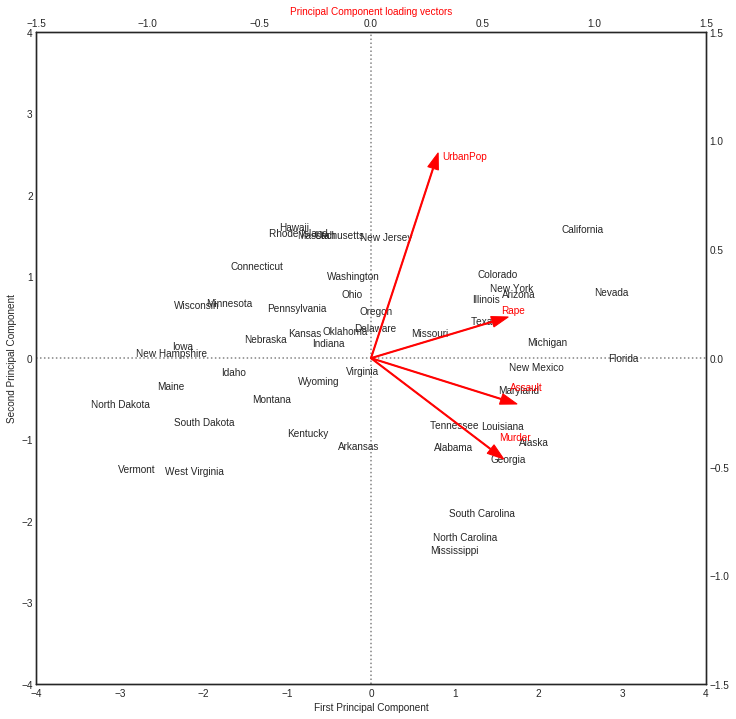

In [121]:
fig , ax1 = plt.subplots(figsize=(12,12))

ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-4,4, linestyles='dotted', colors='grey')
ax1.vlines(0,-4,4, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1.5,1.5)
ax2.set_xlim(-1.5,1.5)
ax2.tick_params(axis='y', colors='red')
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1
pca_loadings = LVectors.T
for i in pca_loadings[['L1', 'L2']].index:
    ax2.annotate(i, (pca_loadings.L1.loc[i]*a+0.04, -pca_loadings.L2.loc[i]*a+0.04), color='red')

# Plot vectors
ax2.arrow(0,0,pca_loadings.L1[0], -pca_loadings.L2[0],color='r', width=0.005, head_width=0.05)
ax2.arrow(0,0,pca_loadings.L1[1], -pca_loadings.L2[1],color='r', width=0.005, head_width=0.05)
ax2.arrow(0,0,pca_loadings.L1[2], -pca_loadings.L2[2],color='r', width=0.005, head_width=0.05)
ax2.arrow(0,0,pca_loadings.L1[3], -pca_loadings.L2[3],color='r', width=0.005, head_width=0.05);

In [122]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [123]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [124]:
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

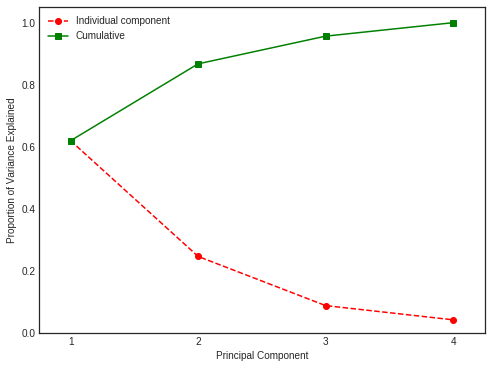

In [131]:
plt.figure(figsize=(8,6))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '--o', c='r', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', c='g', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

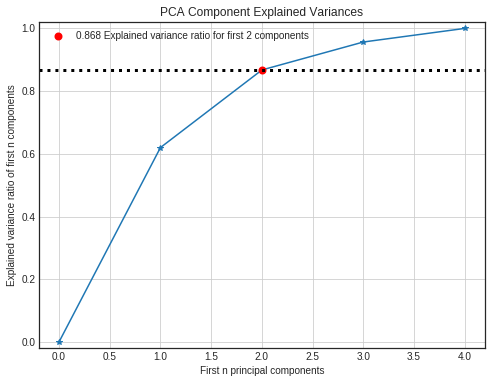

In [135]:
plot_pca_component_variance(pca, target_explained_variance=0.8,figsize=(8,6));